> Trabalho da disciplina de Inteligência Artificial sobre Algoritmos de Aprendizado de Máquina.
>> Feito por: **Henrique Navarro Morais.**

# Importações necessárias

In [1]:
import pandas as pd
import random
import numpy as np
from sklearn import *

In [ ]:
#Instação da extensão 'Collapsible Headings' para melhor visualização dos cabeçalhos
import os
os.system('pip install -q jupyter_contrib_nbextensions')
os.system('jupyter contrib nbextension install --user')
os.system('jupyter nbextension enable collapsible_headings/main --quiet')

# Sobre a Base de Dados

> A base de dados possui diversos atributos sobre diversas pessoas adultas dos EUS, e seu principal objetivo é apontar se a renda do indivíduo é inferior ou superior a 50K.
>
> Link da base de dados: https://archive.ics.uci.edu/ml/datasets/Adult

 > Foram feitas diversas operações na base de dados original, de forma que os dados foram tratados, limpos, convertidos e padronizados. Justamante para melhorar a qualidade e a confiabilidade dos dados a fim de serem usados por algoritmos de aprendizado de máquina.
> 
> Será feita a importação de 2 versões da base de dados, uma versão sem os atributos desnecessários, sem os exemplos denecessários e duplicados, e outra com essas mesmas características, porém, com todos os dados convertidos para numéricos e padronizados.
>
> O atributo de saída da base de dados é a **Renda**, de forma que na base de dados numérica, padronizada com valores de -10 a +10, os exemplos com valor igual a <=50K serão representadas como -10, já os exemplos que assumirem o valor de >50K, serão representados como +10.

In [2]:
db_clean = pd.read_csv('./databases/db_clean.csv')
db = pd.read_csv('./databases/db_num_ree.csv')

In [3]:
display(db_clean.head())
display(db.head())

,Idade,Classe Trabalhadora,Educacao,Num Educacao,Ocupacao,Ganho de Capital,Perda de Capital,Horas por Semana,Renda
0,39,State-gov,Bachelors,13,Adm-clerical,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,0,0,13,<=50K
2,38,Private,HS-grad,9,Handlers-cleaners,0,0,40,<=50K
3,53,Private,11th,7,Handlers-cleaners,0,0,40,<=50K
4,28,Private,Bachelors,13,Prof-specialty,0,0,40,<=50K


,Idade,Classe Trabalhadora,Educacao,Num Educacao,Ocupacao,Ganho de Capital,Perda de Capital,Horas por Semana,Renda
0,-3.230769,-10.0,-10.000000,6.000000,-10.000000,-8.277065,-10.0,-0.370370,-10.0
1,0.153846,-7.5,-10.000000,6.000000,-8.571429,-10.000000,-10.0,-7.037037,-10.0
2,-3.538462,-5.0,-8.666667,0.666667,-7.142857,-10.000000,-10.0,-0.370370,-10.0
3,1.076923,-5.0,-7.333333,-2.000000,-7.142857,-10.000000,-10.0,-0.370370,-10.0
4,-6.615385,-5.0,-10.000000,6.000000,-5.714286,-10.000000,-10.0,-0.370370,-10.0


# Técnica de Validação

> O método hold-out envolve a divisão do conjunto de dados em dois subconjuntos distintos: um conjunto de **treinamento** e um conjunto de **teste.**
> 
> A base de dados analisada foi dividida **20%** dos exemplos serão usados como **testes** e os **80%** restantes dos exemplos serão usados para **treino.**

In [4]:
def split_dataset(dataset, test_ratio):
    dataset_array = dataset.to_numpy()
    num_samples = len(dataset_array)
    np.random.shuffle(dataset_array)
    num_test_samples = int(num_samples * test_ratio)
    train_data = dataset_array[num_test_samples:]
    test_data = dataset_array[:num_test_samples]
    train_data = pd.DataFrame(train_data, columns=dataset.columns)
    test_data = pd.DataFrame(test_data, columns=dataset.columns)
    
    return train_data, test_data

db_treino, db_teste = split_dataset(db, test_ratio=0.2)
#db_clean_treino, db_clean_teste = split_dataset(db_clean, test_ratio=0.2)

In [5]:
print(f'Tamanho subconjunto de treino: {db_treino.shape[0]} exemplos\nTamanho subconjunto de teste: {db_teste.shape[0]} exemplos')
display(db_treino.head(3))
display(db_teste.head(3))

Tamanho subconjunto de treino: 17920 exemplos
Tamanho subconjunto de teste: 4480 exemplos


,Idade,Classe Trabalhadora,Educacao,Num Educacao,Ocupacao,Ganho de Capital,Perda de Capital,Horas por Semana,Renda
0,-1.384615,5.0,-8.666667,0.666667,-2.857143,-10.0,-10.0,-0.370370,-10.0
1,-0.461538,-5.0,-8.666667,0.666667,2.857143,-10.0,-10.0,-1.358025,-10.0
2,-7.538462,0.0,-6.000000,7.333333,-5.714286,-10.0,-10.0,-5.308642,-10.0


,Idade,Classe Trabalhadora,Educacao,Num Educacao,Ocupacao,Ganho de Capital,Perda de Capital,Horas por Semana,Renda
0,-5.384615,-5.0,-3.333333,2.000000,0.000000,-10.0,-10.0,2.098765,-10.0
1,-1.384615,-5.0,-8.666667,0.666667,-7.142857,-10.0,-10.0,1.604938,10.0
2,-4.769231,-5.0,-4.666667,-4.666667,1.428571,-10.0,-10.0,-0.370370,-10.0


# Métricas

> Converter dados não numéricos em uma representação numérica é uma etapa crucial para garantir que os algoritmos possam processar e extrair insights úteis dos dados.

In [61]:
def convert_labels_to_numeric(labels):
    unique_labels = list(set(labels))
    label_map = {label: i for i, label in enumerate(unique_labels)}
    numeric_labels = [label_map[label] for label in labels]
    return numeric_labels

> **Acurácia:** é uma medida que indica a taxa de classificações corretas em relação ao total de amostras. É uma medida geral de desempenho do modelo, indicando a proporção de previsões corretas em relação ao número total de previsões.

In [62]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = 0
    total_predictions = len(y_true)

    for true_label, predicted_label in zip(y_true, y_pred):
        if true_label == predicted_label:
            correct_predictions += 1

    accuracy = correct_predictions / total_predictions

    return accuracy

> **Precisão:** é uma medida que indica a proporção de verdadeiros positivos em relação ao total de positivos previstos (verdadeiros positivos + falsos positivos).

In [63]:
def calculate_precision(y_true, y_pred):
    true_positives = 0
    false_positives = 0

    for true_label, predicted_label in zip(y_true, y_pred):
        if predicted_label == 1:
            if true_label == predicted_label:
                true_positives += 1
            else:
                false_positives += 1

    if true_positives + false_positives == 0:
        precision = 0
    else:
        precision = true_positives / (true_positives + false_positives)

    return precision

> **Recall:** também conhecido como taxa de verdadeiros positivos ou sensibilidade, é uma medida que indica a proporção de verdadeiros positivos em relação ao total de positivos reais (verdadeiros positivos + falsos negativos).

In [64]:
def calculate_recall(y_true, y_pred):
    true_positives = 0
    false_negatives = 0

    for true_label, predicted_label in zip(y_true, y_pred):
        if true_label == predicted_label == 1:
            true_positives += 1
        elif true_label == 1 and predicted_label == 0:
            false_negatives += 1

    if true_positives + false_negatives == 0:
        recall = 0
    else:
        recall = true_positives / (true_positives + false_negatives)

    return recall

> **Matriz de confusão:** uma tabela que mostra o desempenho do modelo de classificação em relação às classes reais. Ela apresenta a contagem de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.

In [81]:
def calculate_confusion_matrix(y_true, y_pred):
    true_positives = 0
    true_negatives = 0
    false_positives = 0
    false_negatives = 0

    for true_label, predicted_label in zip(y_true, y_pred):
        if true_label == predicted_label == 1:
            true_positives += 1
        elif true_label == predicted_label == 0:
            true_negatives += 1
        elif true_label == 0 and predicted_label == 1:
            false_positives += 1
        elif true_label == 1 and predicted_label == 0:
            false_negatives += 1

    confusion_df = pd.DataFrame({
        'Previsto P': [true_positives, false_positives],
        'Previsto N': [false_negatives, true_negatives]
    }, index=['Real P', 'Real N'])

    return confusion_df

def calculate_confusion_matrix_bl(y_true, y_pred):
    confusion = confusion_matrix(y_true, y_pred)
    confusion_df = pd.DataFrame(
        confusion,
        index=['Real P', 'Real N'],
        columns=['Previsto P', 'Previsto N']
    )
    return confusion_df

# Algoritmo Baseline

> **Algoritmo baseline** é um método simples que serve como ponto de referência para avaliar o desempenho de modelos mais avançados. Nesse caso, foi utilizado um algoritmo que calcula a frequência de cada classe no conjunto de treinamento e, em seguida, atribui a classe majoritária a todas as instâncias do conjunto de teste.

In [74]:
class_counts = db_treino['Renda'].value_counts()
majority_class = class_counts.idxmax()
majority_class_proportion = class_counts[majority_class] / len(db_treino)

def baseline_predict():    
    return pd.Series([majority_class] * len(db_teste), index=db_teste.index)

baseline_predictions = baseline_predict()

class_counts_df = pd.DataFrame({'Valor': class_counts.index, 'Frequência': class_counts.values})
display(class_counts_df)

,Valor,Frequência
0,-10.0,12750
1,10.0,5170


> Como a base de dados foi padronizada com valores entre o intervalo numérico de **[-10 a +10]**, a classe mais frequente na base de dados é **-10**, ou seja, que representa justamente o valor **<=50K** assumido pelo atributo **Renda.**

# K-NN

> O algoritmo **K-NN** atribui rótulos às instâncias de teste com base nos rótulos das instâncias vizinhas mais próximas no espaço de atributos. O valor de **k** determina o **número de vizinhos** considerados.

In [66]:
from sklearn.neighbors import KNeighborsClassifier
def knn_model(train_data, test_data, k):
    train_data = train_data.copy()
    test_data = test_data.copy()

    X_train = train_data.drop('Renda', axis=1)
    y_train = train_data['Renda']
    X_test = test_data.drop('Renda', axis=1)
    y_test = test_data['Renda']

    for column in X_train.columns:
        if X_train[column].dtype != 'object':
            X_train[column] = pd.cut(X_train[column], bins=5, labels=False)
            X_test[column] = pd.cut(X_test[column], bins=5, labels=False)

    y_train = convert_labels_to_numeric(y_train)
    y_test = convert_labels_to_numeric(y_test)

    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = calculate_accuracy(y_test, y_pred)
    precision = calculate_precision(y_test, y_pred)
    recall = calculate_recall(y_test, y_pred)
    confusion = calculate_confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, confusion

In [211]:
def metricas_knn():
    k_values = [1, 5, 20, 50, 100]
    results = []

    for k in k_values:
        accuracy, precision, recall, confusion = knn_model(db_treino, db_teste, k)
        results.append([k, accuracy, precision, recall])

    columns = ['k', 'accuracy', 'precision', 'recall']
    metricas_res = pd.DataFrame(results, columns=columns)
    display(metricas_res)
    display(confusion)
    
    return metricas_res, confusion
    
metricas_knn_res, confusion_knn = metricas_knn()

,k,accuracy,precision,recall
0,1,0.716518,0.811111,0.781979
1,5,0.759598,0.799144,0.882483
2,20,0.771652,0.800503,0.902647
3,50,0.775446,0.793131,0.924071
4,100,0.783259,0.792719,0.939824


,Previsto P,Previsto N
Real P,526,780
Real N,191,2983


> É possível verificar médidas do desempenho do algoritmo K-NN com diversas variações de **K**

# Árvore C4.5

> O algoritmo **C4.5** é um algoritmo de árvore de decisão que constrói uma árvore de decisão onde cada nó interno representa um teste em um atributo e cada ramo representa um resultado desse teste. 
> 
> O **C4.5** utiliza o ganho de informação para determinar a melhor divisão dos dados em cada nó da árvore.

In [111]:
from sklearn.tree import DecisionTreeClassifier
def arvorec4_5(train_data, test_data, criterio):
    train_data = train_data.copy()
    test_data = test_data.copy()

    X_train = train_data.drop('Renda', axis=1)
    y_train = train_data['Renda']
    X_test = test_data.drop('Renda', axis=1)
    y_test = test_data['Renda']

    for column in X_train.columns:
        if X_train[column].dtype != 'object':
            X_train[column] = pd.cut(X_train[column], bins=5, labels=False)
            X_test[column] = pd.cut(X_test[column], bins=5, labels=False)

    y_train = convert_labels_to_numeric(y_train)
    y_test = convert_labels_to_numeric(y_test)

    c4_5 = DecisionTreeClassifier(criterion=criterio)
    c4_5.fit(X_train, y_train)

    y_pred = c4_5.predict(X_test)

    accuracy = calculate_accuracy(y_test, y_pred)
    precision = calculate_precision(y_test, y_pred)
    recall = calculate_recall(y_test, y_pred)
    confusion = calculate_confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, confusion

In [215]:
def metricas_arvore():
    results = []
    metricas = ['entropy', 'gini', 'friedman_mse', 'mse']

    for metrica in metricas:
        accuracy, precision, recall, confusion = arvorec4_5(db_treino, db_teste, 'entropy')
        results.append([metrica, accuracy, precision, recall])

    columns = ['criterio', 'accuracy', 'precision', 'recall']

    metricas_res = pd.DataFrame(results, columns=columns)
    display(metricas_res)
    display(confusion)
    
    return metricas_res, confusion

metricas_arvore_res, confusion_arvore = metricas_arvore()

,criterio,accuracy,precision,recall
0,entropy,0.764509,0.806302,0.878702
1,gini,0.764286,0.806246,0.878387
2,friedman_mse,0.765179,0.806647,0.879332
3,mse,0.764955,0.806769,0.878702


,Previsto P,Previsto N
Real P,638,668
Real N,385,2789


> Possível verificar o desempenho do modelo com base em diferentes métricas

# MLP

> **MLP**  é uma arquitetura de rede neural artificial composta por múltiplas camadas de neurônios. Cada neurônio em uma camada está conectado a todos os neurônios nas camadas adjacentes. 
> 
> O **MLP** é treinado usando o algoritmo de backpropagation, que ajusta os pesos das conexões para minimizar a diferença entre as saídas previstas e os valores de destino.

> retirar bibliotecas

In [123]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

def mlp_model(train_data, test_data, hidden_layer_sizes, random_state=42):
    train_data = train_data.copy()
    test_data = test_data.copy()

    X_train = train_data.drop('Renda', axis=1)
    y_train = train_data['Renda']
    X_test = test_data.drop('Renda', axis=1)
    y_test = test_data['Renda']

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=200, random_state=random_state)
        mlp.fit(X_train, y_train)

        y_pred = mlp.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    confusion = calculate_confusion_matrix(y_test, y_pred)
    
    return accuracy, precision, recall, confusion

In [218]:
def metricas_mlp():
    results = []
    hidden_layer_sizes = [(5,), (10,), (25,), (50,)]
    random_state = 42

    for hidden_layers in hidden_layer_sizes:
        accuracy, precision, recall, confusion = mlp_model(db_treino, db_teste, hidden_layer_sizes=hidden_layers, random_state=random_state)
        results.append([hidden_layers, accuracy, precision, recall])

    columns = ['hidden_layers', 'accuracy', 'precision', 'recall']
    metricas_res = pd.DataFrame(results, columns=columns)
    display(metricas_res)
    display(confusion)
    
    return metricas_res, confusion
    
metricas_mlp_res, confusion_mlp =metricas_mlp()

,hidden_layers,accuracy,precision,recall
0,"(5,)",0.789062,0.781461,0.789062
1,"(10,)",0.793304,0.784387,0.793304
2,"(25,)",0.791071,0.782555,0.791071
3,"(50,)",0.792857,0.786374,0.792857


,Previsto P,Previsto N
Real P,2983,191
Real N,737,569


# Resultados Baseline

In [107]:
def calculate_metrics_bl():
    predictions = baseline_predict()
    accuracy = calculate_accuracy_bl(db_teste['Renda'], predictions)
    precision = calculate_precision_bl(db_teste['Renda'], predictions, pos_label=-10.0)
    recall = calculate_recall_bl(db_teste['Renda'], predictions, pos_label=-10.0)
    confusion = calculate_confusion_matrix_bl(db_teste['Renda'], predictions)
    return accuracy, precision, recall, confusion

def calculate_accuracy_bl(y_true, y_pred):
    correct_predictions = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy


def calculate_precision_bl(y_true, y_pred, pos_label):
    true_positives = sum(1 for true, pred in zip(y_true, y_pred) if true == pred == pos_label)
    predicted_positives = sum(1 for pred in y_pred if pred == pos_label)
    precision = true_positives / predicted_positives if predicted_positives > 0 else 0.0
    return precision


def calculate_recall_bl(y_true, y_pred, pos_label):
    true_positives = sum(1 for true, pred in zip(y_true, y_pred) if true == pred == pos_label)
    actual_positives = sum(1 for true in y_true if true == pos_label)
    recall = true_positives / actual_positives if actual_positives > 0 else 0.0
    return recall


def calculate_confusion_matrix_bl(y_true, y_pred):
    confusion = confusion_matrix(y_true, y_pred)
    confusion_df = pd.DataFrame(
        confusion,
        index=['Real P', 'Real N'],
        columns=['Previsto P', 'Previsto N']
    )
    return confusion_df

In [160]:
def metricas_baseline():
    accuracy, precision, recall, confusion = calculate_metrics_baseline_bl()

    metrics_table = pd.DataFrame({'accuracy': [accuracy], 'precision': [precision], 'recall': [recall]})
    display(metrics_table)
    display(confusion)
    
    return metrics_table, confusion

metrics_baseline, confusion_baseline = metricas_baseline()

,accuracy,precision,recall
0,0.708482,0.708482,1.0


,Previsto P,Previsto N
Real P,3174,0
Real N,1306,0


> A acurácia do algoritmo baseline foi de 0.71183, o que significa que ele classificou corretamente 71.183% das instâncias do conjunto de teste.
>
> A precisão do algoritmo baseline foi de 1.0, indicando que todas as instâncias classificadas como positivas (classe majoritária) estavam corretas.
>
>O recall do algoritmo baseline foi de 0.41583, o que significa que ele identificou corretamente 41.583% das instâncias positivas do conjunto de teste.
>
> Ao analisar a matriz de confusão, podemos observar o seguinte:
>
>>True Positive (Verdadeiros Positivos): O algoritmo baseline classificou corretamente 3189 instâncias como positivas (classe majoritária).
>>
>>False Positive (Falsos Positivos): O algoritmo baseline não classificou nenhuma instância negativa (classe minoritária) como positiva incorretamente.
>>
>>True Negative (Verdadeiros Negativos): O algoritmo baseline classificou corretamente todas as instâncias negativas como negativas.
>>
>>False Negative (Falsos Negativos): O algoritmo baseline classificou incorretamente 1291 instâncias positivas como negativas.

# Resultados 3 algoritmos

In [220]:
metrics_baseline, confusion_baseline = metricas_baseline()

,accuracy,precision,recall
0,0.708482,0.708482,1.0


,Previsto P,Previsto N
Real P,3174,0
Real N,1306,0


In [214]:
metricas_knn_res, confusion_knn = metricas_knn()

,k,accuracy,precision,recall
0,1,0.716518,0.811111,0.781979
1,5,0.759598,0.799144,0.882483
2,20,0.771652,0.800503,0.902647
3,50,0.775446,0.793131,0.924071
4,100,0.783259,0.792719,0.939824


,Previsto P,Previsto N
Real P,526,780
Real N,191,2983


In [216]:
metricas_arvore_res, confusion_arvore = metricas_arvore()

,criterio,accuracy,precision,recall
0,entropy,0.764509,0.806302,0.878702
1,gini,0.764955,0.806592,0.879017
2,friedman_mse,0.763839,0.805957,0.878072
3,mse,0.764732,0.806358,0.879017


,Previsto P,Previsto N
Real P,636,670
Real N,384,2790


In [219]:
metricas_mlp_res, confusion_mlp =metricas_mlp()

,hidden_layers,accuracy,precision,recall
0,"(5,)",0.789062,0.781461,0.789062
1,"(10,)",0.793304,0.784387,0.793304
2,"(25,)",0.791071,0.782555,0.791071
3,"(50,)",0.792857,0.786374,0.792857


,Previsto P,Previsto N
Real P,2983,191
Real N,737,569


> Acurácia

In [253]:
import matplotlib.pyplot as plt
def plotar_histograma(values, title):
    values = values
    model_labels = ['Baseline', 'KNN', 'Árvore de Decisão', 'MLP']
    plt.figure(figsize=(14, 6))
    plt.bar(model_labels, values)
    plt.xlabel('Modelos')
    plt.ylabel('Acurácia')
    plt.title(title)
    plt.show()

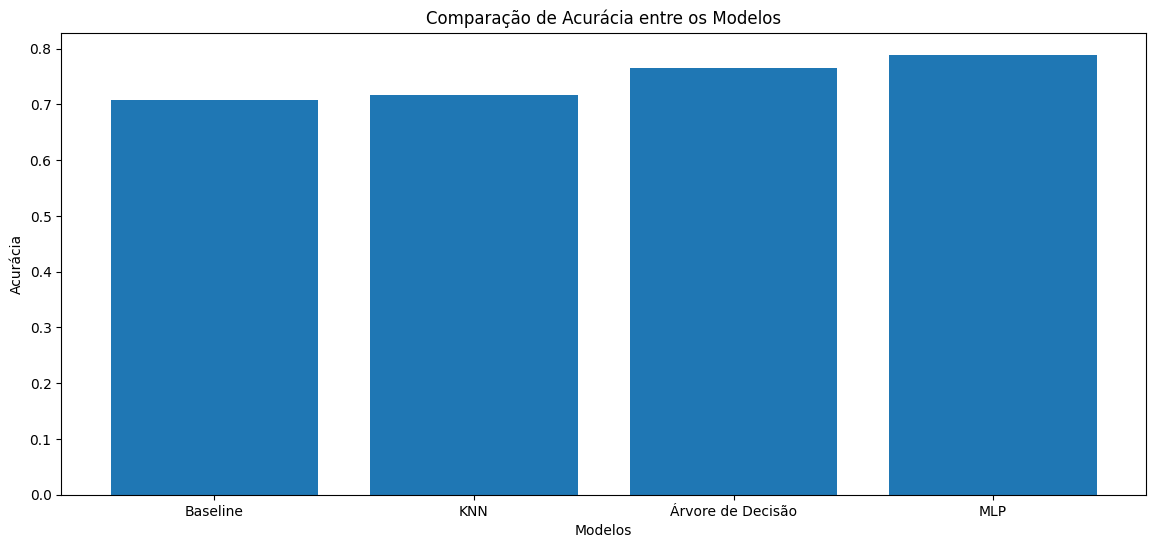

In [254]:
accuracy_baseline = metrics_baseline['accuracy'].iloc[0]
accuracy_knn = metricas_knn_res['accuracy'].iloc[0]
accuracy_arvore = metricas_arvore_res['accuracy'].iloc[0]
accuracy_mlp = metricas_mlp_res['accuracy'].iloc[0]
plotar_histograma(values=[accuracy_baseline, accuracy_knn, accuracy_arvore, accuracy_mlp], title='Comparação de Acurácia entre os Modelos')

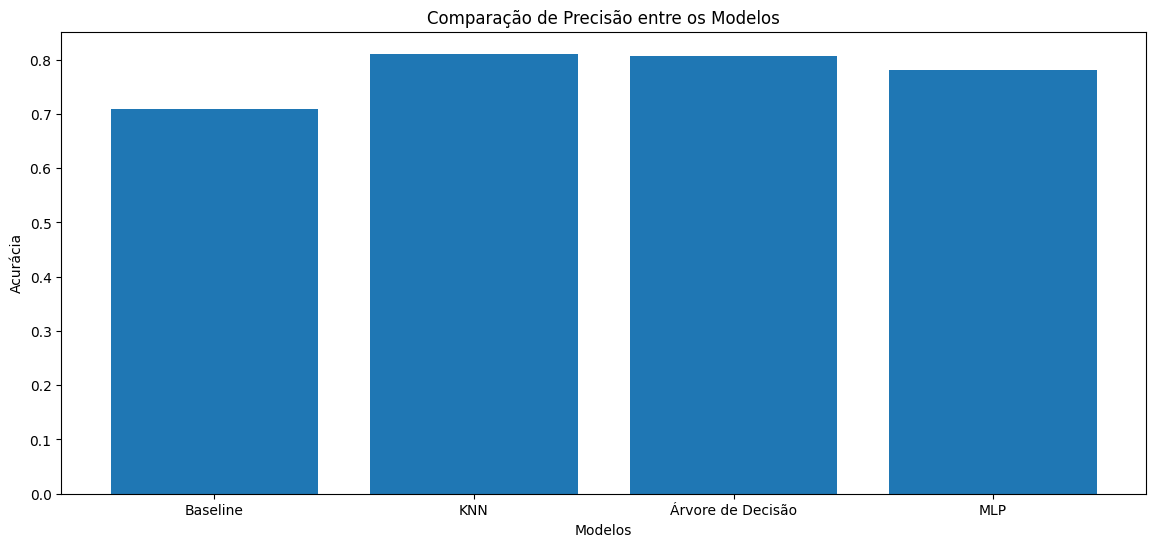

In [255]:
precision_baseline = metrics_baseline['precision'].iloc[0]
precision_knn = metricas_knn_res['precision'].iloc[0]
precision_arvore = metricas_arvore_res['precision'].iloc[0]
precision_mlp = metricas_mlp_res['precision'].iloc[0]
plotar_histograma(values=[precision_baseline, precision_knn, precision_arvore, precision_mlp], title='Comparação de Precisão entre os Modelos')

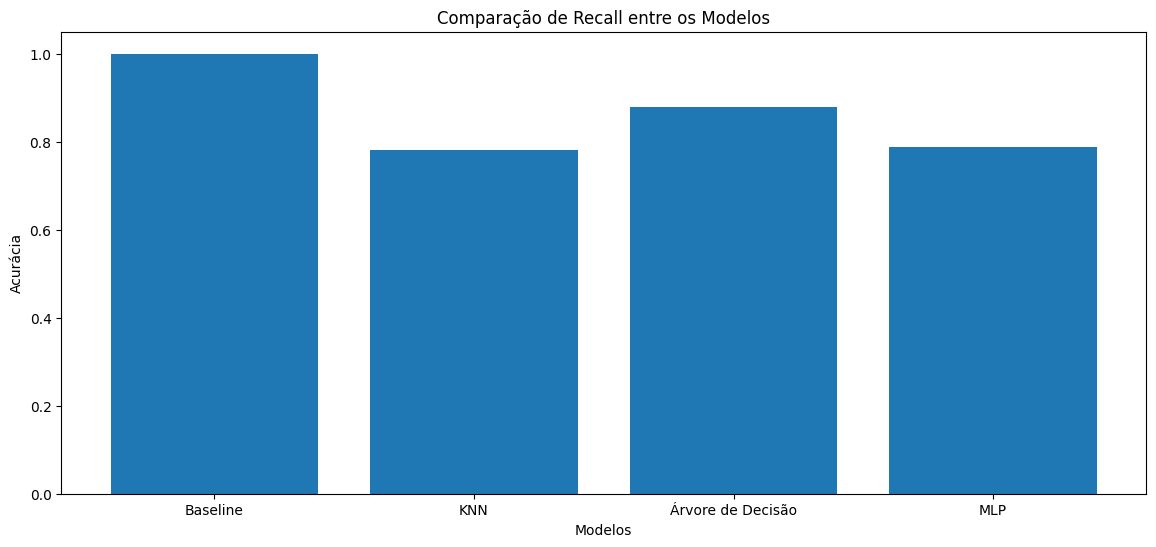

In [256]:
recall_baseline = metrics_baseline['recall'].iloc[0]
recall_knn = metricas_knn_res['recall'].iloc[0]
recall_arvore = metricas_arvore_res['recall'].iloc[0]
recall_mlp = metricas_mlp_res['recall'].iloc[0]
plotar_histograma(values=[recall_baseline, recall_knn, recall_arvore, recall_mlp], title='Comparação de Recall entre os Modelos')

In [277]:
def plotar_linha(values, title): 
    model_labels = ['Baseline', 'KNN', 'Árvore de Decisão', 'MLP']
    accuracy_values = values
    plt.figure(figsize=(14, 6))
    plt.plot(model_labels, accuracy_values, marker='o')
    plt.xlabel('Modelos')
    plt.ylabel('Acurácia')
    plt.title(title)
    plt.show()

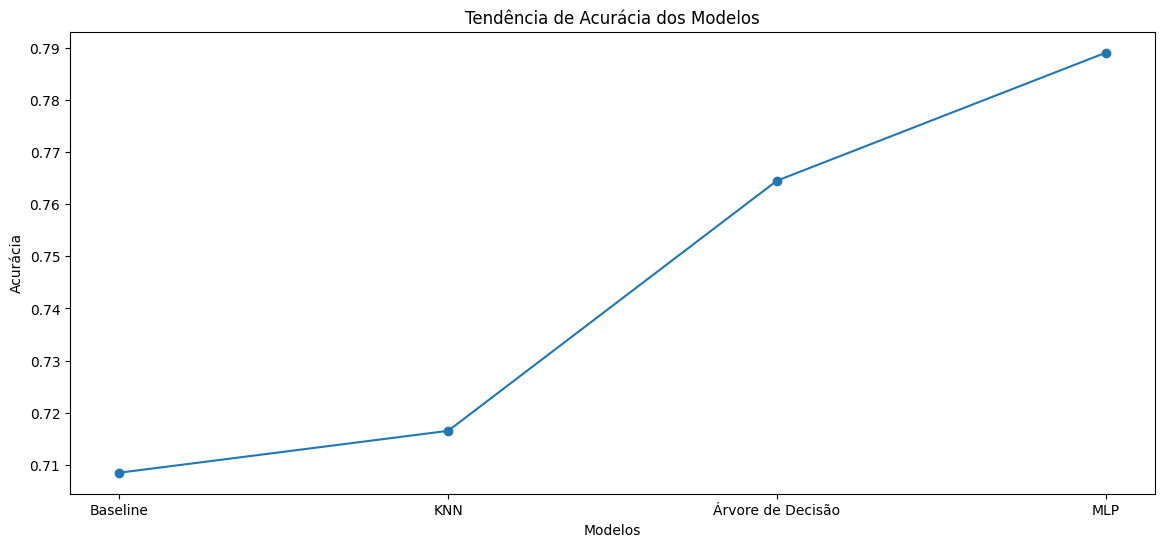

In [278]:
plotar_linha(values=[accuracy_baseline, accuracy_knn, accuracy_arvore, accuracy_mlp], title='Tendência de Acurácia dos Modelos')

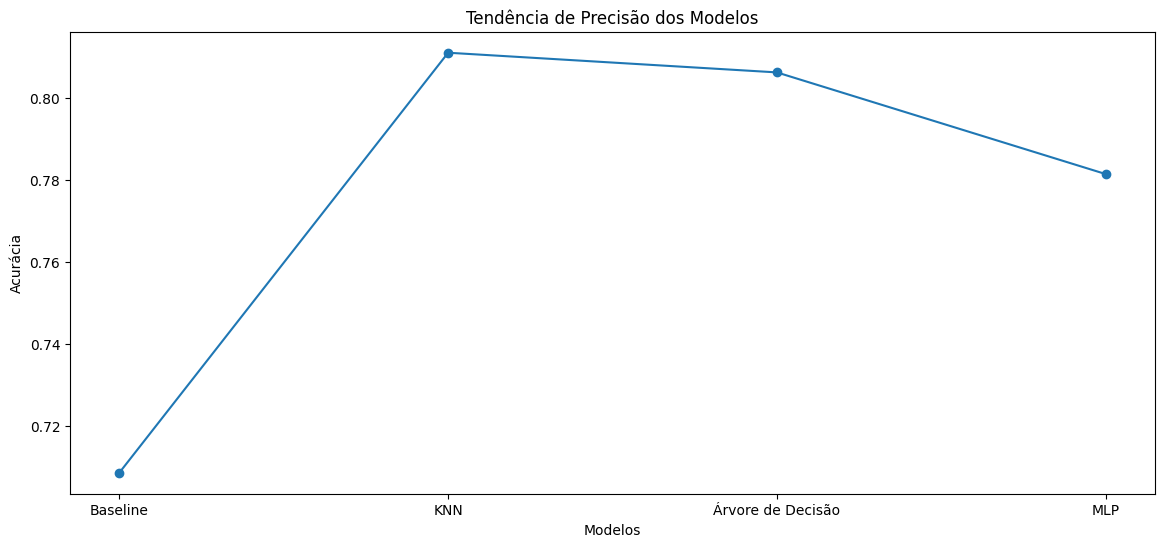

In [279]:
plotar_linha(values=[precision_baseline, precision_knn, precision_arvore, precision_mlp], title='Tendência de Precisão dos Modelos')

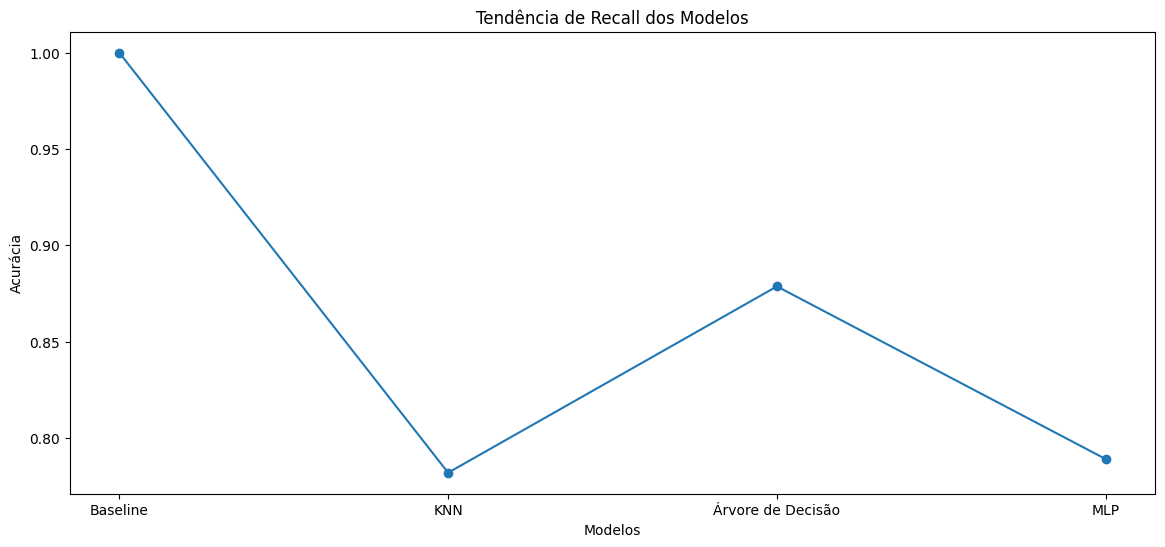

In [280]:
plotar_linha(values=[recall_baseline, recall_knn, recall_arvore, recall_mlp], title='Tendência de Recall dos Modelos')

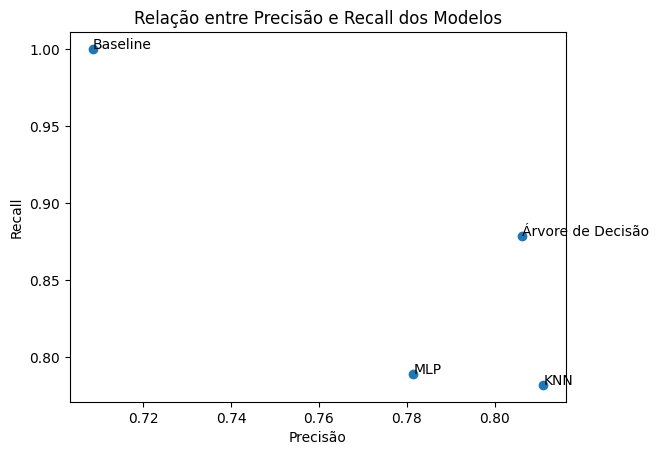

In [283]:
def plotar_dispersao():
    precision_values = [precision_baseline, precision_knn, precision_arvore, precision_mlp]
    recall_values = [recall_baseline, recall_knn, recall_arvore, recall_mlp]

    plt.scatter(precision_values, recall_values)
    plt.xlabel('Precisão')
    plt.ylabel('Recall')
    plt.title('Relação entre Precisão e Recall dos Modelos')
    for i, label in enumerate(model_labels):
        plt.annotate(label, (precision_values[i], recall_values[i]))
    plt.show()

plotar_dispersao()